In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from newGraphDiscovery import GraphDiscoveryNew
from Modes import ModeContainer
import numpy as onp
import matplotlib.pyplot as plt
import networkx as nx
import pickle
from glob import glob

In [6]:
# load data from file
data = np.load('SachsData.npy')

# sub-select data
Ntrain = 2000
data_out = data[np.random.randint(low=0,high=data.shape[0],size=(Ntrain)),:]
print(data_out.shape)

(2000, 11)


In [9]:
# normalize data
X=(data_out-np.mean(data_out,axis=0))/np.std(data_out,axis=0)
print(X.shape)

# normalize log data
log_data = np.log(data_out)
Xlog = (log_data-np.mean(log_data,axis=0))/np.std(log_data,axis=0)
print(Xlog.shape)

(2000, 11)
(2000, 11)


[]

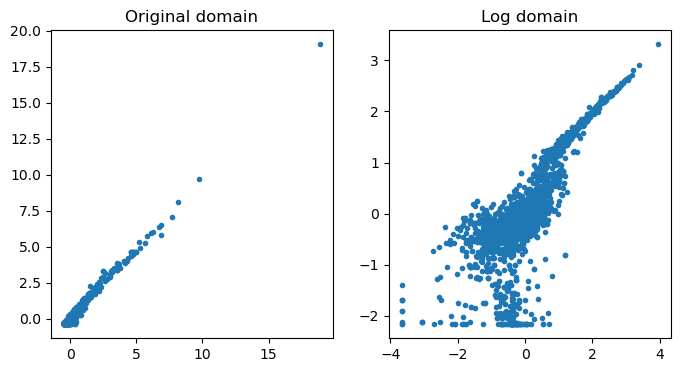

In [10]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('Original domain')
plt.plot(X[:,0],X[:,1],'.')
plt.subplot(1,2,2)
plt.title('Log domain')
plt.plot(Xlog[:,0],Xlog[:,1],'.')

In [11]:
node_names=[
    '$Raf$',
    '$Mek$',
    '$Plcg$',
    '$PIP2$',
    '$PIP3$',
    '$Erk$',
    '$Akt$',
    '$PKA$',
    '$PKC$',
    '$P38$',
    '$Jnk$'
]
modes=ModeContainer.make_container(
    X.T,
    onp.array(node_names),
    {'name':'linear','beta':0.1,'type':'individual','interpolatory':False,'default':True},
    {'name':'quadratic','beta':0.1,'type':'pairwise','interpolatory':False,'default':True},
    {'name':'gaussian','beta':0.1,'type':'combinatorial','interpolatory':True,'default':True,'l':1.0},
)

In [12]:
graph_discovery = GraphDiscoveryNew(X.T,onp.array(node_names),modes)

In [13]:
for node in graph_discovery.names:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(node,gamma='auto')
    print('\n')

inspecting $Raf$
linear kernel (using gamma=3.44e+01)
 n/(n+s)=0.25, Z=1.00
quadratic kernel (using gamma=3.09e+01)
 n/(n+s)=0.40, Z=1.00


AttributeError: module 'numpy' has no attribute 'res'

inspecting $Raf$
linear kernel (using gamma=5.23e+00)
 n/(n+s)=0.37, Z=1.00
quadratic kernel (using gamma=4.97e+00)
 n/(n+s)=0.45, Z=0.99
$Raf$ has ancestors with linear kernel (n/(s+n)=0.37)
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$PIP3$', '$Erk$', '$Akt$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.37, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$Erk$', '$Akt$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.37, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$Erk$', '$Akt$', '$PKC$', '$Jnk$']
 n/(n+s)=0.37, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$Erk$', '$Akt$', '$Jnk$']
 n/(n+s)=0.37, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Erk$', '$Akt$', '$Jnk$']
 n/(n+s)=0.37, Z=1.00
ancestors : ['$Mek$', '$Erk$', '$Akt$', '$Jnk$']
 n/(n+s)=0.37, Z=1.00
ancestors : ['$Mek$', '$Akt$', '$Jnk$']
 n/(n+s)=0.37, Z=1.00
ancestors : ['$Mek$', '$Jnk$']
 n/(n+s)=0.38, Z=1.00
ancestors : ['$Mek$']
 n/(n+s)=0.39, Z=1.00


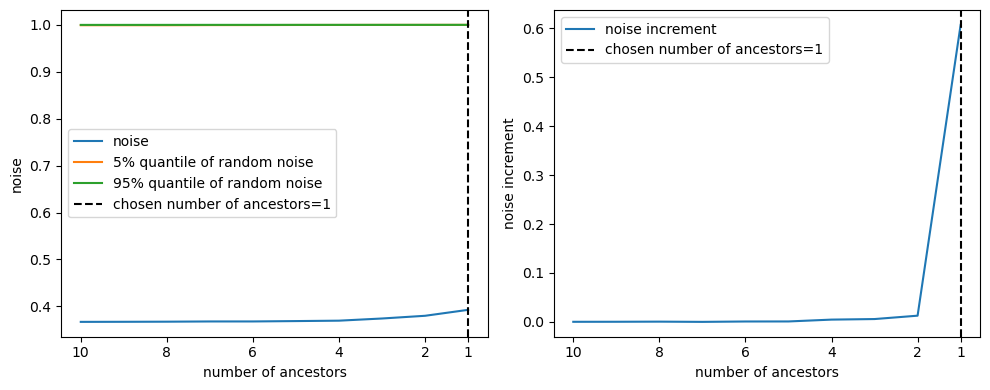

ancestors after pruning:  ['$Mek$'] 



inspecting $Mek$
linear kernel (using gamma=5.13e+00)
 n/(n+s)=0.37, Z=1.00
quadratic kernel (using gamma=4.56e+00)
 n/(n+s)=0.44, Z=0.99
$Mek$ has ancestors with linear kernel (n/(s+n)=0.37)
ancestors : ['$Raf$', '$Plcg$', '$PIP2$', '$Erk$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.38, Z=1.00
ancestors : ['$Raf$', '$Plcg$', '$PIP2$', '$Erk$', '$Akt$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.38, Z=1.00
ancestors : ['$Raf$', '$Plcg$', '$PIP2$', '$Erk$', '$Akt$', '$PKC$', '$P38$']
 n/(n+s)=0.38, Z=1.00
ancestors : ['$Raf$', '$Plcg$', '$PIP2$', '$Erk$', '$Akt$', '$P38$']
 n/(n+s)=0.38, Z=1.00
ancestors : ['$Raf$', '$Plcg$', '$PIP2$', '$Erk$', '$Akt$']
 n/(n+s)=0.38, Z=1.00
ancestors : ['$Raf$', '$Plcg$', '$Erk$', '$Akt$']
 n/(n+s)=0.38, Z=1.00
ancestors : ['$Raf$', '$Erk$', '$Akt$']
 n/(n+s)=0.38, Z=1.00
ancestors : ['$Raf$', '$Akt$']
 n/(n+s)=0.39, Z=1.00
ancestors : ['$Raf$']
 n/(n+s)=0.40, Z=1.00


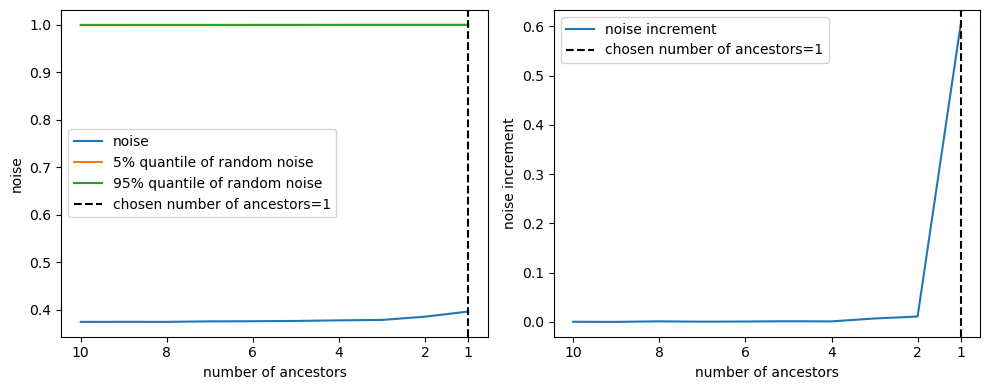

ancestors after pruning:  ['$Raf$'] 



inspecting $Plcg$
linear kernel (using gamma=1.63e+01)
 n/(n+s)=0.74, Z=1.00
quadratic kernel (using gamma=7.43e+00)
 n/(n+s)=0.83, Z=1.00
$Plcg$ has ancestors with linear kernel (n/(s+n)=0.74)
ancestors : ['$Raf$', '$Mek$', '$PIP2$', '$PIP3$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.74, Z=1.00
ancestors : ['$Raf$', '$Mek$', '$PIP2$', '$PIP3$', '$Akt$', '$PKA$', '$P38$', '$Jnk$']
 n/(n+s)=0.74, Z=1.00
ancestors : ['$Mek$', '$PIP2$', '$PIP3$', '$Akt$', '$PKA$', '$P38$', '$Jnk$']
 n/(n+s)=0.74, Z=1.00
ancestors : ['$Mek$', '$PIP2$', '$PIP3$', '$Akt$', '$P38$', '$Jnk$']
 n/(n+s)=0.74, Z=1.00
ancestors : ['$Mek$', '$PIP2$', '$PIP3$', '$Akt$', '$Jnk$']
 n/(n+s)=0.74, Z=1.00
ancestors : ['$PIP2$', '$PIP3$', '$Akt$', '$Jnk$']
 n/(n+s)=0.73, Z=1.00
ancestors : ['$PIP2$', '$Akt$', '$Jnk$']
 n/(n+s)=0.75, Z=1.00
ancestors : ['$PIP2$', '$Jnk$']
 n/(n+s)=0.75, Z=1.00
ancestors : ['$PIP2$']
 n/(n+s)=0.74, Z=1.00


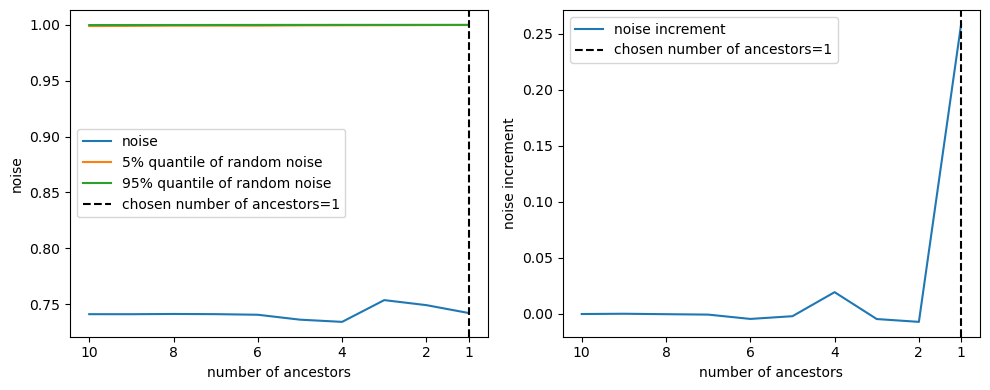

ancestors after pruning:  ['$PIP2$'] 



inspecting $PIP2$
linear kernel (using gamma=1.70e+01)
 n/(n+s)=0.73, Z=1.00
quadratic kernel (using gamma=1.48e+01)
 n/(n+s)=0.84, Z=1.00
$PIP2$ has ancestors with linear kernel (n/(s+n)=0.73)
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP3$', '$Erk$', '$Akt$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.73, Z=1.00
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP3$', '$Erk$', '$Akt$', '$PKC$', '$P38$']
 n/(n+s)=0.73, Z=1.00
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP3$', '$Akt$', '$PKC$', '$P38$']
 n/(n+s)=0.73, Z=1.00
ancestors : ['$Raf$', '$Plcg$', '$PIP3$', '$Akt$', '$PKC$', '$P38$']
 n/(n+s)=0.73, Z=1.00
ancestors : ['$Plcg$', '$PIP3$', '$Akt$', '$PKC$', '$P38$']
 n/(n+s)=0.73, Z=1.00
ancestors : ['$Plcg$', '$PIP3$', '$Akt$', '$PKC$']
 n/(n+s)=0.72, Z=1.00
ancestors : ['$Plcg$', '$PIP3$', '$PKC$']
 n/(n+s)=0.72, Z=1.00
ancestors : ['$Plcg$', '$PIP3$']
 n/(n+s)=0.71, Z=1.00
ancestors : ['$Plcg$']
 n/(n+s)=0.74, Z=1.00


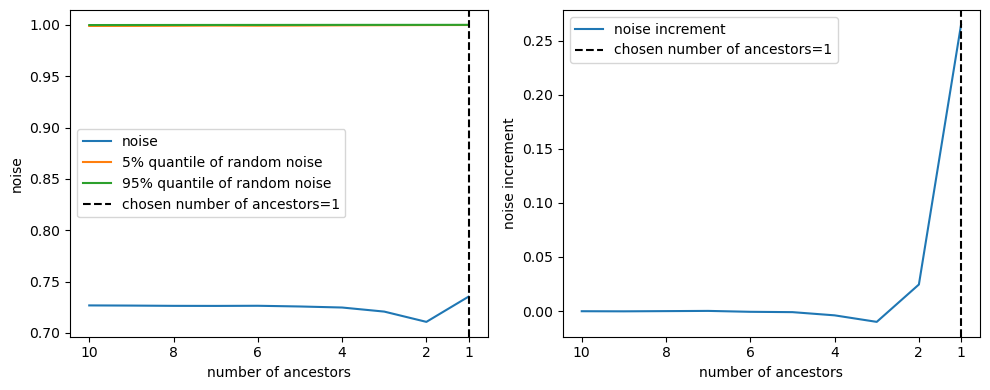

ancestors after pruning:  ['$Plcg$'] 



inspecting $PIP3$
linear kernel (using gamma=4.20e+01)
 n/(n+s)=0.98, Z=1.00
quadratic kernel (using gamma=4.04e+01)
 n/(n+s)=0.97, Z=1.00
$PIP3$ has ancestors with quadratic kernel (n/(s+n)=0.97)
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP2$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.96, Z=1.00
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP2$', '$Akt$', '$PKA$', '$PKC$', '$Jnk$']
 n/(n+s)=0.96, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$Akt$', '$PKA$', '$PKC$', '$Jnk$']
 n/(n+s)=0.97, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$Akt$', '$PKA$', '$Jnk$']
 n/(n+s)=0.97, Z=1.00
ancestors : ['$Plcg$', '$PIP2$', '$Akt$', '$PKA$', '$Jnk$']
 n/(n+s)=0.97, Z=1.00
ancestors : ['$Plcg$', '$PIP2$', '$Akt$', '$PKA$']
 n/(n+s)=0.97, Z=1.00
ancestors : ['$Plcg$', '$PIP2$', '$PKA$']
 n/(n+s)=0.97, Z=1.00
ancestors : ['$PIP2$', '$PKA$']
 n/(n+s)=0.98, Z=1.00
ancestors : ['$PIP2$']
 n/(n+s)=0.99, Z=1.00


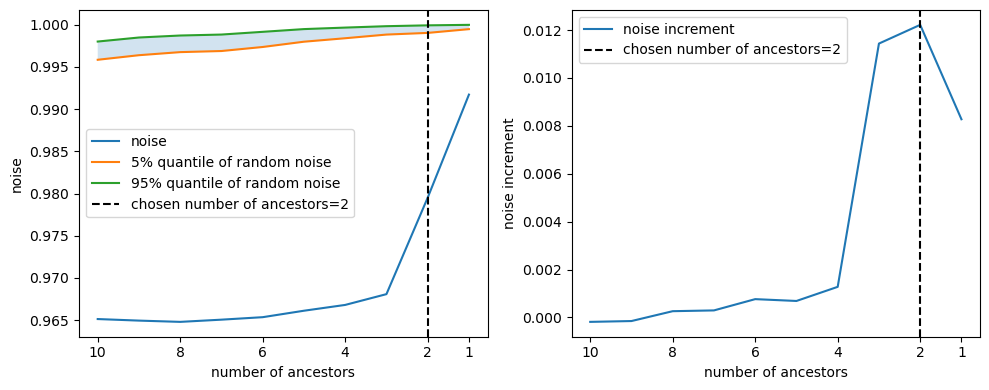

ancestors after pruning:  ['$PIP2$', '$PKA$'] 



inspecting $Erk$
linear kernel (using gamma=2.60e+01)
 n/(n+s)=0.83, Z=1.00
quadratic kernel (using gamma=1.92e+01)
 n/(n+s)=0.77, Z=1.00
$Erk$ has ancestors with quadratic kernel (n/(s+n)=0.77)
ancestors : ['$Raf$', '$Mek$', '$PIP2$', '$PIP3$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.77, Z=1.00
ancestors : ['$Raf$', '$Mek$', '$PIP3$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.77, Z=1.00
ancestors : ['$Raf$', '$Mek$', '$Akt$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.77, Z=1.00
ancestors : ['$Raf$', '$Mek$', '$Akt$', '$PKA$', '$PKC$', '$P38$']
 n/(n+s)=0.76, Z=1.00
ancestors : ['$Raf$', '$Mek$', '$Akt$', '$PKA$', '$PKC$']
 n/(n+s)=0.76, Z=1.00
ancestors : ['$Raf$', '$Mek$', '$Akt$', '$PKA$']
 n/(n+s)=0.76, Z=1.00
ancestors : ['$Mek$', '$Akt$', '$PKA$']
 n/(n+s)=0.76, Z=1.00
ancestors : ['$Akt$', '$PKA$']
 n/(n+s)=0.78, Z=1.00
ancestors : ['$Akt$']
 n/(n+s)=0.90, Z=1.00


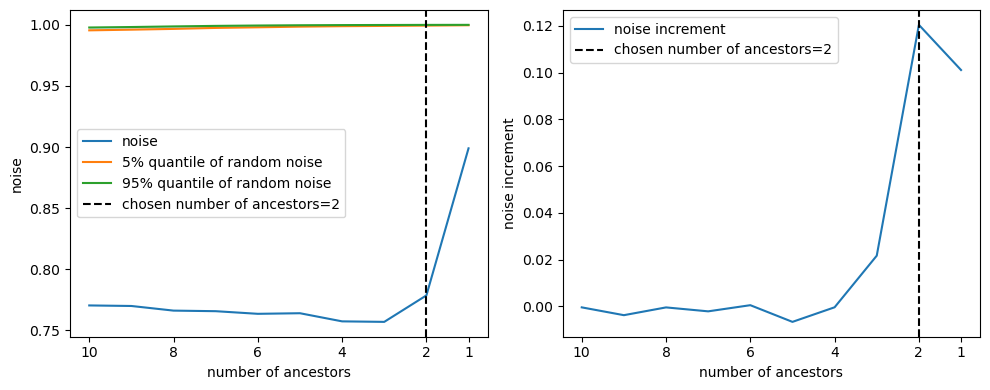

ancestors after pruning:  ['$Akt$', '$PKA$'] 



inspecting $Akt$
linear kernel (using gamma=2.38e+01)
 n/(n+s)=0.86, Z=1.00
quadratic kernel (using gamma=1.33e+01)
 n/(n+s)=0.81, Z=1.00
$Akt$ has ancestors with quadratic kernel (n/(s+n)=0.81)
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$PIP3$', '$Erk$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.81, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PIP3$', '$Erk$', '$PKA$', '$PKC$', '$P38$', '$Jnk$']
 n/(n+s)=0.80, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PIP3$', '$Erk$', '$PKA$', '$P38$', '$Jnk$']
 n/(n+s)=0.81, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Erk$', '$PKA$', '$P38$', '$Jnk$']
 n/(n+s)=0.82, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Erk$', '$PKA$', '$Jnk$']
 n/(n+s)=0.82, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Erk$', '$PKA$']
 n/(n+s)=0.83, Z=1.00
ancestors : ['$Plcg$', '$Erk$', '$PKA$']
 n/(n+s)=0.85, Z=1.00
ancestors : ['$Erk$', '$PKA$']
 n/(n+s)=0.85, Z=1.00
ancestors : ['$Erk$']
 n/(n+s)=0.94, Z=1.00


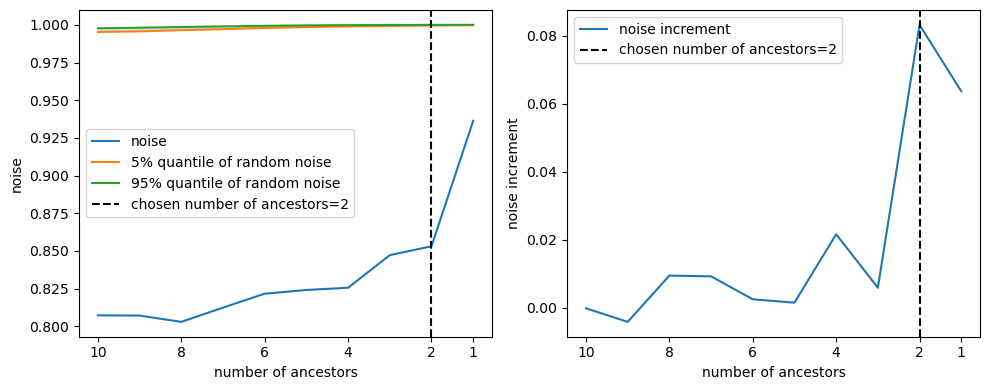

ancestors after pruning:  ['$Erk$', '$PKA$'] 



inspecting $PKA$
linear kernel (using gamma=3.86e+01)
 n/(n+s)=0.95, Z=1.00
quadratic kernel (using gamma=3.61e+01)
 n/(n+s)=0.95, Z=1.00
$PKA$ has ancestors with linear kernel (n/(s+n)=0.95)
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP2$', '$PIP3$', '$Erk$', '$Akt$', '$P38$', '$Jnk$']
 n/(n+s)=0.95, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$PIP3$', '$Erk$', '$Akt$', '$P38$', '$Jnk$']
 n/(n+s)=0.95, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$Erk$', '$Akt$', '$P38$', '$Jnk$']
 n/(n+s)=0.95, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Erk$', '$Akt$', '$P38$', '$Jnk$']
 n/(n+s)=0.95, Z=1.00
ancestors : ['$Plcg$', '$Erk$', '$Akt$', '$P38$', '$Jnk$']
 n/(n+s)=0.95, Z=1.00
ancestors : ['$Plcg$', '$Erk$', '$Akt$', '$P38$']
 n/(n+s)=0.94, Z=1.00
ancestors : ['$Plcg$', '$Erk$', '$Akt$']
 n/(n+s)=0.94, Z=1.00
ancestors : ['$Erk$', '$Akt$']
 n/(n+s)=0.94, Z=1.00
ancestors : ['$Erk$']
 n/(n+s)=0.99, Z=1.00


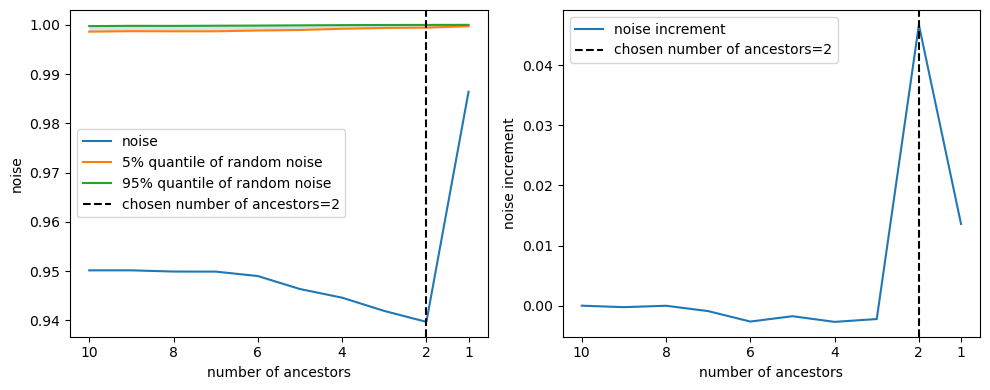

ancestors after pruning:  ['$Erk$', '$Akt$'] 



inspecting $PKC$
linear kernel (using gamma=1.44e+01)
 n/(n+s)=0.72, Z=1.00
quadratic kernel (using gamma=8.91e+00)
 n/(n+s)=0.85, Z=0.99
$PKC$ has ancestors with linear kernel (n/(s+n)=0.72)
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$PIP3$', '$Erk$', '$Akt$', '$PKA$', '$P38$', '$Jnk$']
 n/(n+s)=0.72, Z=1.00
ancestors : ['$Mek$', '$PIP2$', '$PIP3$', '$Erk$', '$Akt$', '$PKA$', '$P38$', '$Jnk$']
 n/(n+s)=0.72, Z=1.00
ancestors : ['$Mek$', '$PIP2$', '$Erk$', '$Akt$', '$PKA$', '$P38$', '$Jnk$']
 n/(n+s)=0.72, Z=1.00
ancestors : ['$Mek$', '$PIP2$', '$Erk$', '$Akt$', '$P38$', '$Jnk$']
 n/(n+s)=0.72, Z=1.00
ancestors : ['$PIP2$', '$Erk$', '$Akt$', '$P38$', '$Jnk$']
 n/(n+s)=0.72, Z=1.00
ancestors : ['$Erk$', '$Akt$', '$P38$', '$Jnk$']
 n/(n+s)=0.72, Z=1.00
ancestors : ['$Erk$', '$P38$', '$Jnk$']
 n/(n+s)=0.72, Z=1.00
ancestors : ['$P38$', '$Jnk$']
 n/(n+s)=0.72, Z=1.00
ancestors : ['$P38$']
 n/(n+s)=0.68, Z=1.00


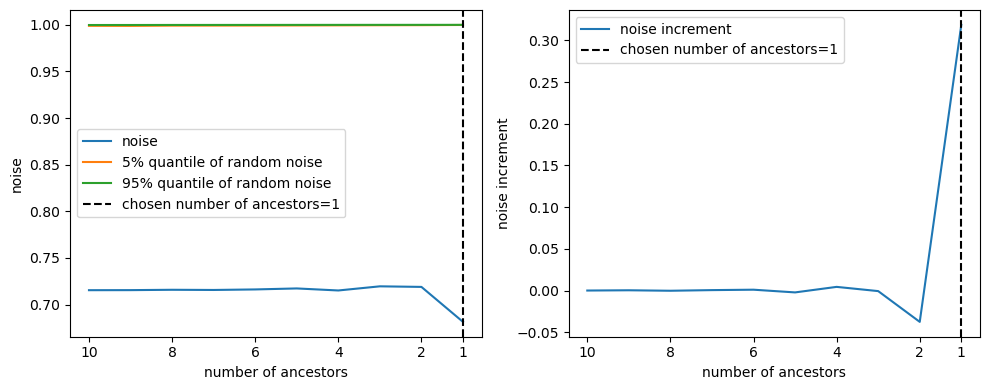

ancestors after pruning:  ['$P38$'] 



inspecting $P38$
linear kernel (using gamma=1.46e+01)
 n/(n+s)=0.72, Z=1.00
quadratic kernel (using gamma=1.37e+01)
 n/(n+s)=0.88, Z=1.00
$P38$ has ancestors with linear kernel (n/(s+n)=0.72)
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$PIP3$', '$Erk$', '$Akt$', '$PKA$', '$PKC$', '$Jnk$']
 n/(n+s)=0.72, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$Erk$', '$Akt$', '$PKA$', '$PKC$', '$Jnk$']
 n/(n+s)=0.72, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Erk$', '$Akt$', '$PKA$', '$PKC$', '$Jnk$']
 n/(n+s)=0.72, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Akt$', '$PKA$', '$PKC$', '$Jnk$']
 n/(n+s)=0.72, Z=1.00
ancestors : ['$Plcg$', '$Akt$', '$PKA$', '$PKC$', '$Jnk$']
 n/(n+s)=0.72, Z=1.00
ancestors : ['$Plcg$', '$Akt$', '$PKC$', '$Jnk$']
 n/(n+s)=0.72, Z=1.00
ancestors : ['$Plcg$', '$PKC$', '$Jnk$']
 n/(n+s)=0.72, Z=1.00
ancestors : ['$PKC$', '$Jnk$']
 n/(n+s)=0.72, Z=1.00
ancestors : ['$PKC$']
 n/(n+s)=0.68, Z=1.00


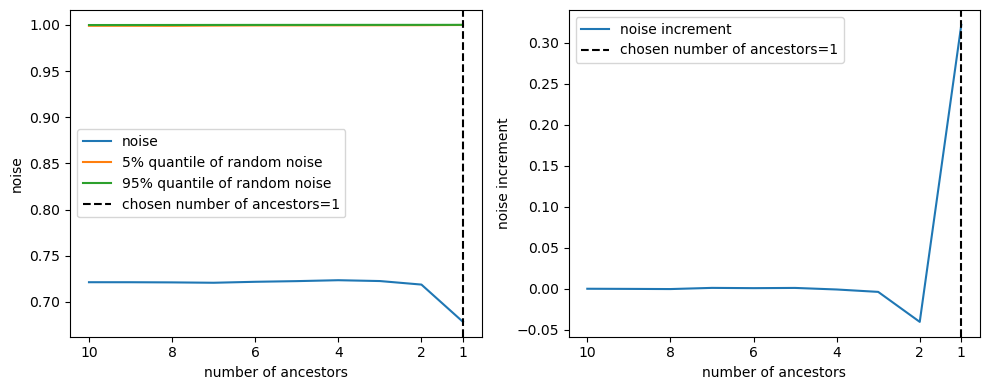

ancestors after pruning:  ['$PKC$'] 



inspecting $Jnk$
linear kernel (using gamma=2.79e+01)
 n/(n+s)=0.93, Z=1.00
quadratic kernel (using gamma=2.49e+01)
 n/(n+s)=0.94, Z=1.00
$Jnk$ has ancestors with linear kernel (n/(s+n)=0.93)
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP2$', '$PIP3$', '$Akt$', '$PKA$', '$PKC$', '$P38$']
 n/(n+s)=0.93, Z=1.00
ancestors : ['$Raf$', '$Plcg$', '$PIP2$', '$PIP3$', '$Akt$', '$PKA$', '$PKC$', '$P38$']
 n/(n+s)=0.93, Z=1.00
ancestors : ['$Plcg$', '$PIP2$', '$PIP3$', '$Akt$', '$PKA$', '$PKC$', '$P38$']
 n/(n+s)=0.93, Z=1.00
ancestors : ['$Plcg$', '$PIP3$', '$Akt$', '$PKA$', '$PKC$', '$P38$']
 n/(n+s)=0.93, Z=1.00
ancestors : ['$Plcg$', '$Akt$', '$PKA$', '$PKC$', '$P38$']
 n/(n+s)=0.93, Z=1.00
ancestors : ['$Plcg$', '$Akt$', '$PKC$', '$P38$']
 n/(n+s)=0.93, Z=1.00
ancestors : ['$Akt$', '$PKC$', '$P38$']
 n/(n+s)=0.92, Z=1.00
ancestors : ['$PKC$', '$P38$']
 n/(n+s)=0.93, Z=1.00
ancestors : ['$PKC$']
 n/(n+s)=0.88, Z=1.00


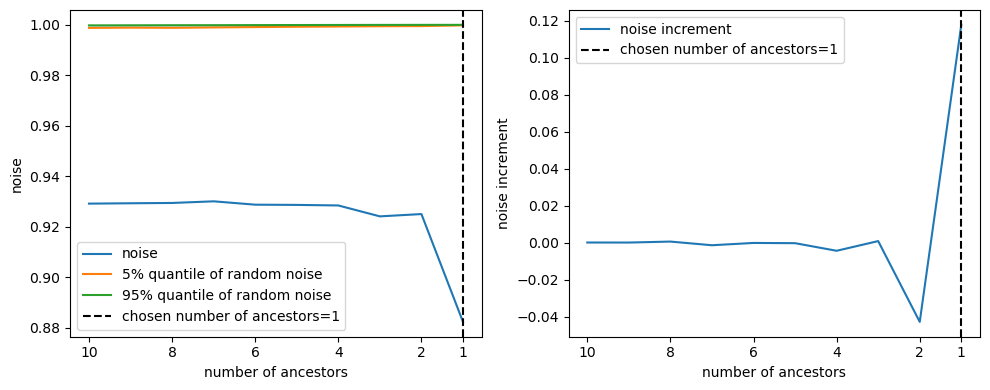

ancestors after pruning:  ['$PKC$'] 





In [ ]:
for node in [graph_discovery.names[0]]:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(node,gamma='auto')
    print('\n')

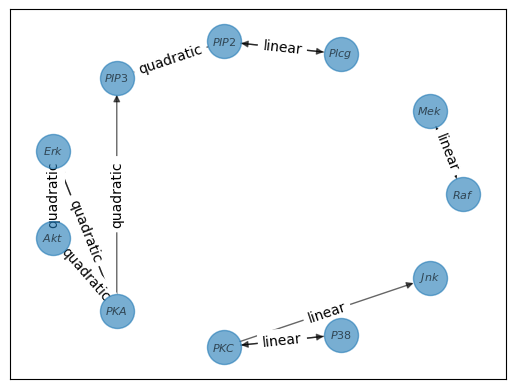

In [ ]:
graph_discovery.plot_graph()

## Repeat analysis with subset of graph

In [ ]:
# evaluate residuals after doing linear regression

Xreg = onp.hstack((X[:,:index],X[:,index+1:]))
Yreg = X[:,index]
beta = onp.linalg.solve(onp.dot(Xreg.T, Xreg), onp.dot(Xreg.T, Yreg))
res  = Yreg - onp.dot(Xreg, beta)
gam  = onp.sqrt(onp.sum(res**2)/Xreg.shape[0])
print(gam)

0.14069186413447057


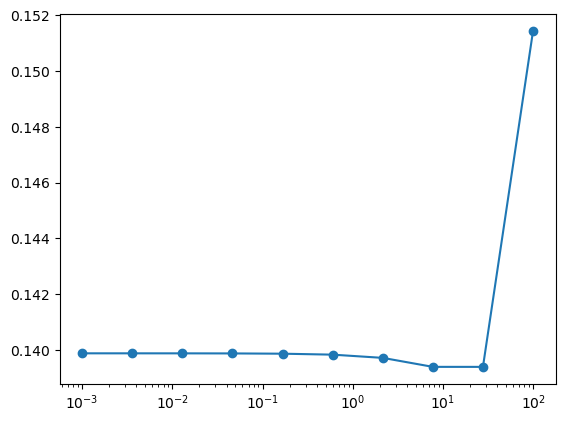

In [ ]:
# do cross-validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    Xreg, Yreg, test_size=0.4, random_state=0)

test_err = onp.zeros((len(gamma_vect),))
for (j,gamma) in enumerate(gamma_vect):
    beta = onp.linalg.solve(onp.dot(X_train.T, X_train) + gamma*onp.eye(X_train.shape[1]), onp.dot(X_train.T, y_train))
    res  = y_test - onp.dot(X_test, beta)
    test_err[j] = onp.sqrt(onp.sum(res**2)/X_test.shape[0])

plt.semilogx(gamma_vect, test_err, '-o')

# Using prior ordering information in DAG

In [66]:
# load data from file
data = np.load('SachsData.npy')

# sub-select data
Ntrain = 2000
l = data[np.random.randint(low=0,high=data.shape[0],size=(Ntrain)),:]
l = np.log(l)

# normalize data
X=(l-np.mean(l,axis=0))/np.std(l,axis=0)
print(X.shape)

(2000, 11)


In [67]:
node_names=[
    '$Raf$',
    '$Mek$',
    '$Plcg$',
    '$PIP2$',
    '$PIP3$',
    '$Erk$',
    '$Akt$',
    '$PKA$',
    '$PKC$',
    '$P38$',
    '$Jnk$'
]
modes=ModeContainer.make_container(
    X.T,
    onp.array(node_names),
    {'name':'linear','beta':0.1,'type':'individual','interpolatory':False,'default':True},
    {'name':'quadratic','beta':0.1,'type':'pairwise','interpolatory':False,'default':True},
    #{'name':'gaussian','beta':0.1,'type':'combinatorial','interpolatory':True,'default':True,'l':2.0},
)

In [68]:
possible_edges=nx.DiGraph()
for index,gene in enumerate(node_names):
    for causing_gene in node_names[:index]:
        possible_edges.add_edge(causing_gene,gene)

inspecting $Raf$
linear kernel (using gamma=2.00e+03)
 n/(n+s)=1.00, Z=1.00
quadratic kernel (using gamma=2.00e+03)
 n/(n+s)=1.00, Z=1.00
$Raf$ has no ancestors



inspecting $Mek$
linear kernel (using gamma=7.14e+02)
 n/(n+s)=0.87, Z=1.00
quadratic kernel (using gamma=6.30e+02)
 n/(n+s)=0.83, Z=1.00
$Mek$ has ancestors with quadratic kernel (n/(s+n)=0.83)


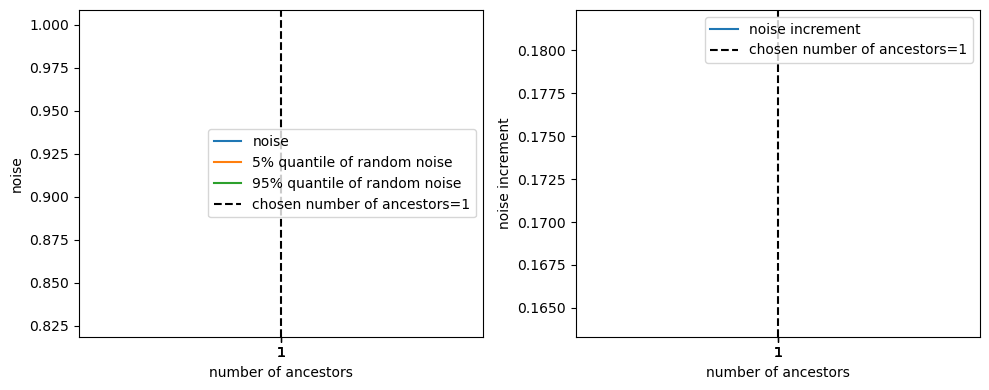

ancestors after pruning:  ['$Raf$'] 



inspecting $Plcg$
linear kernel (using gamma=1.77e+03)
 n/(n+s)=0.98, Z=1.00
quadratic kernel (using gamma=1.55e+03)
 n/(n+s)=0.96, Z=1.00
$Plcg$ has ancestors with quadratic kernel (n/(s+n)=0.96)
ancestors : ['$Mek$']
 n/(n+s)=0.97, Z=1.00


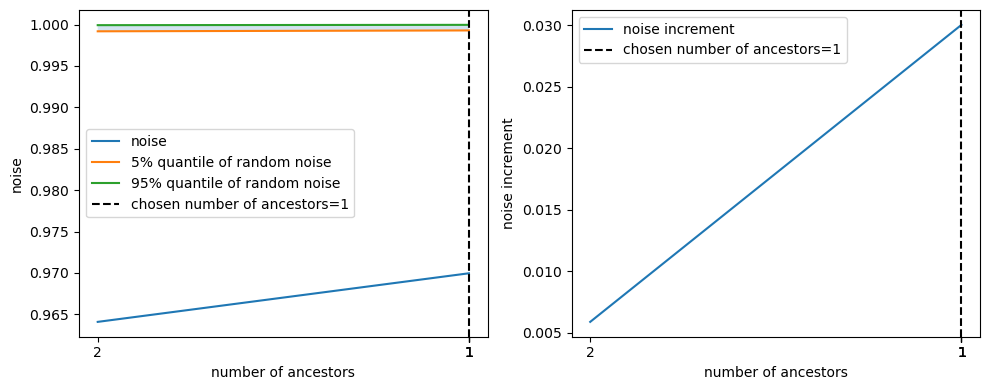

ancestors after pruning:  ['$Mek$'] 



inspecting $PIP2$
linear kernel (using gamma=1.30e+03)
 n/(n+s)=0.95, Z=1.00
quadratic kernel (using gamma=1.27e+03)
 n/(n+s)=0.94, Z=1.00
$PIP2$ has ancestors with quadratic kernel (n/(s+n)=0.94)
ancestors : ['$Mek$', '$Plcg$']
 n/(n+s)=0.93, Z=1.00
ancestors : ['$Plcg$']
 n/(n+s)=0.94, Z=1.00


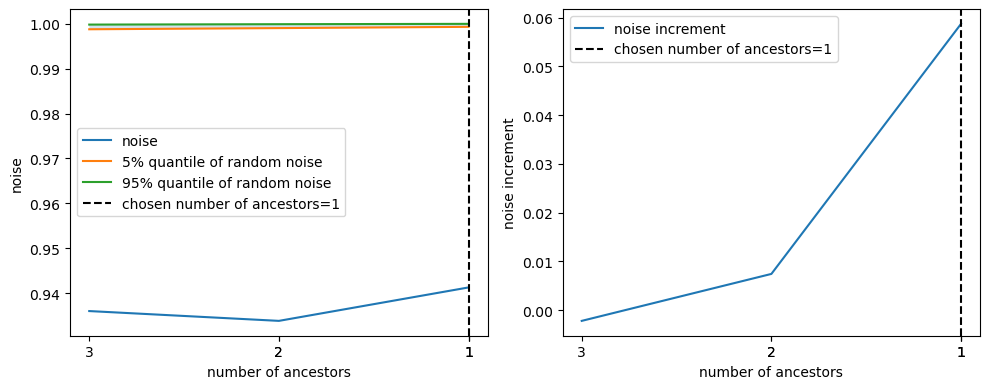

ancestors after pruning:  ['$Plcg$'] 



inspecting $PIP3$
linear kernel (using gamma=1.63e+03)
 n/(n+s)=0.99, Z=1.00
quadratic kernel (using gamma=1.40e+03)
 n/(n+s)=0.98, Z=1.00
$PIP3$ has ancestors with quadratic kernel (n/(s+n)=0.98)
ancestors : ['$Raf$', '$Mek$', '$PIP2$']
 n/(n+s)=0.98, Z=1.00
ancestors : ['$Mek$', '$PIP2$']
 n/(n+s)=0.98, Z=1.00
ancestors : ['$PIP2$']
 n/(n+s)=0.99, Z=1.00


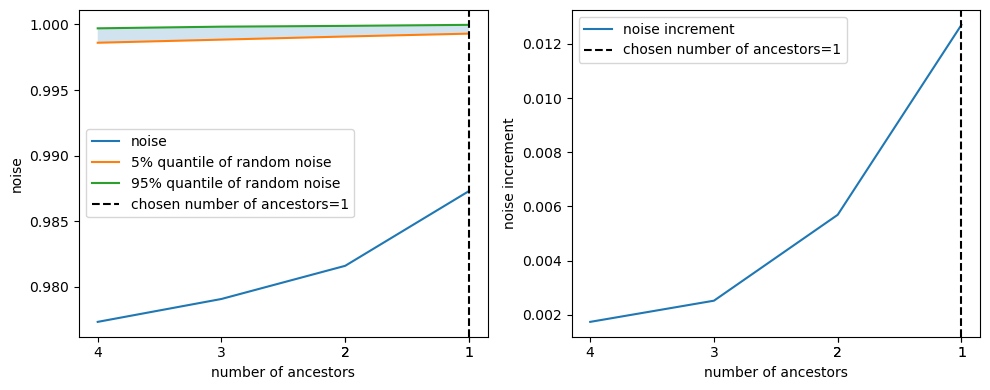

ancestors after pruning:  ['$PIP2$'] 



inspecting $Erk$
linear kernel (using gamma=1.79e+03)
 n/(n+s)=0.99, Z=1.00
quadratic kernel (using gamma=1.50e+03)
 n/(n+s)=0.95, Z=1.00
$Erk$ has ancestors with quadratic kernel (n/(s+n)=0.95)
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP2$']
 n/(n+s)=0.96, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PIP2$']
 n/(n+s)=0.96, Z=1.00
ancestors : ['$Mek$', '$Plcg$']
 n/(n+s)=0.97, Z=1.00
ancestors : ['$Plcg$']
 n/(n+s)=0.98, Z=1.00


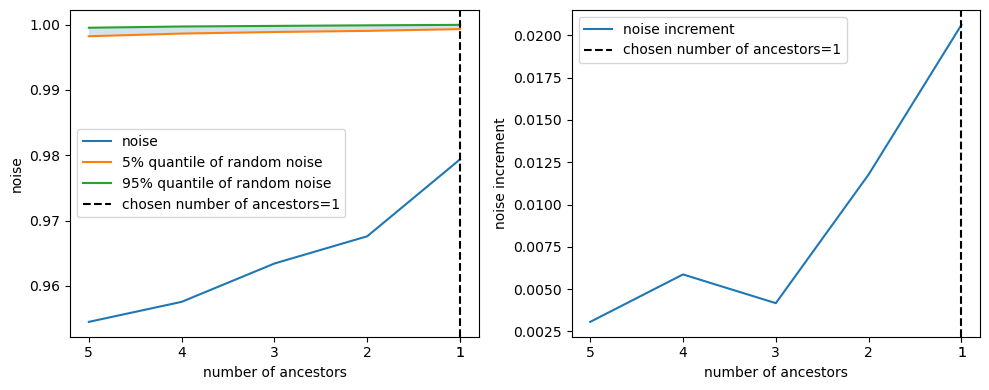

ancestors after pruning:  ['$Plcg$'] 



inspecting $Akt$
linear kernel (using gamma=6.19e+02)
 n/(n+s)=0.82, Z=1.00
quadratic kernel (using gamma=3.83e+02)
 n/(n+s)=0.76, Z=1.00
$Akt$ has ancestors with quadratic kernel (n/(s+n)=0.76)
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP2$', '$Erk$']
 n/(n+s)=0.77, Z=1.00
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$Erk$']
 n/(n+s)=0.76, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Erk$']
 n/(n+s)=0.75, Z=1.00
ancestors : ['$Plcg$', '$Erk$']
 n/(n+s)=0.78, Z=1.00
ancestors : ['$Erk$']
 n/(n+s)=0.83, Z=1.00


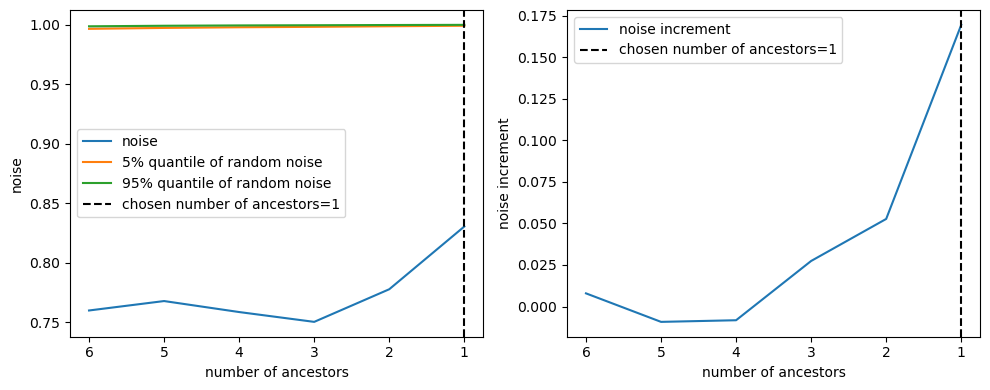

ancestors after pruning:  ['$Erk$'] 



inspecting $PKA$
linear kernel (using gamma=1.11e+03)
 n/(n+s)=0.90, Z=1.00
quadratic kernel (using gamma=6.73e+02)
 n/(n+s)=0.81, Z=1.00
$PKA$ has ancestors with quadratic kernel (n/(s+n)=0.81)
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP2$', '$Erk$', '$Akt$']
 n/(n+s)=0.83, Z=1.00
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP2$', '$Akt$']
 n/(n+s)=0.84, Z=1.00
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$Akt$']
 n/(n+s)=0.83, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Akt$']
 n/(n+s)=0.82, Z=1.00
ancestors : ['$Mek$', '$Plcg$']
 n/(n+s)=0.82, Z=1.00
ancestors : ['$Plcg$']
 n/(n+s)=0.88, Z=1.00


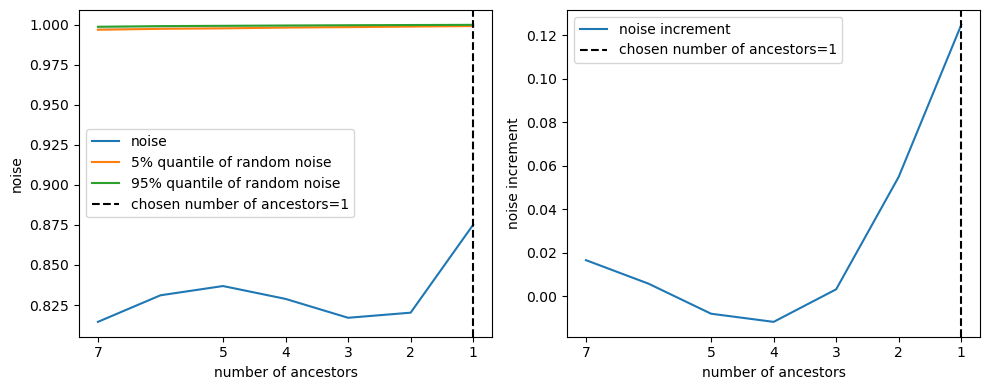

ancestors after pruning:  ['$Plcg$'] 



inspecting $PKC$
linear kernel (using gamma=1.28e+03)
 n/(n+s)=0.94, Z=1.00
quadratic kernel (using gamma=9.64e+02)
 n/(n+s)=0.88, Z=1.00
$PKC$ has ancestors with quadratic kernel (n/(s+n)=0.88)
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP2$', '$Erk$', '$Akt$', '$PKA$']
 n/(n+s)=0.89, Z=1.00
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$Erk$', '$Akt$', '$PKA$']
 n/(n+s)=0.88, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Erk$', '$Akt$', '$PKA$']
 n/(n+s)=0.88, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Erk$', '$PKA$']
 n/(n+s)=0.87, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PKA$']
 n/(n+s)=0.89, Z=1.00
ancestors : ['$Mek$', '$Plcg$']
 n/(n+s)=0.90, Z=1.00
ancestors : ['$Plcg$']
 n/(n+s)=0.94, Z=1.00


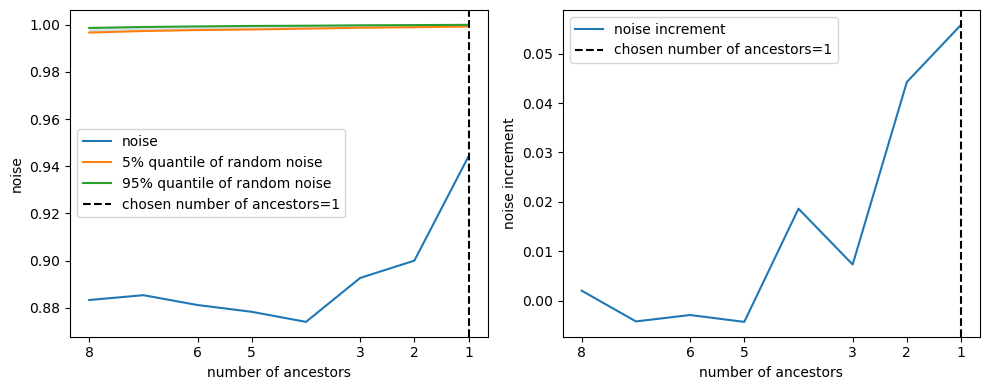

ancestors after pruning:  ['$Plcg$'] 



inspecting $P38$
linear kernel (using gamma=6.30e+02)
 n/(n+s)=0.78, Z=1.00
quadratic kernel (using gamma=5.41e+02)
 n/(n+s)=0.84, Z=1.00
$P38$ has ancestors with linear kernel (n/(s+n)=0.78)
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$PIP3$', '$Erk$', '$Akt$', '$PKA$', '$PKC$']
 n/(n+s)=0.78, Z=1.00
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$Erk$', '$Akt$', '$PKA$', '$PKC$']
 n/(n+s)=0.78, Z=1.00
ancestors : ['$Raf$', '$Mek$', '$Plcg$', '$Akt$', '$PKA$', '$PKC$']
 n/(n+s)=0.78, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Akt$', '$PKA$', '$PKC$']
 n/(n+s)=0.78, Z=1.00
ancestors : ['$Mek$', '$Akt$', '$PKA$', '$PKC$']
 n/(n+s)=0.79, Z=1.00
ancestors : ['$Akt$', '$PKA$', '$PKC$']
 n/(n+s)=0.81, Z=1.00
ancestors : ['$PKA$', '$PKC$']
 n/(n+s)=0.84, Z=1.00
ancestors : ['$PKC$']
 n/(n+s)=0.89, Z=1.00


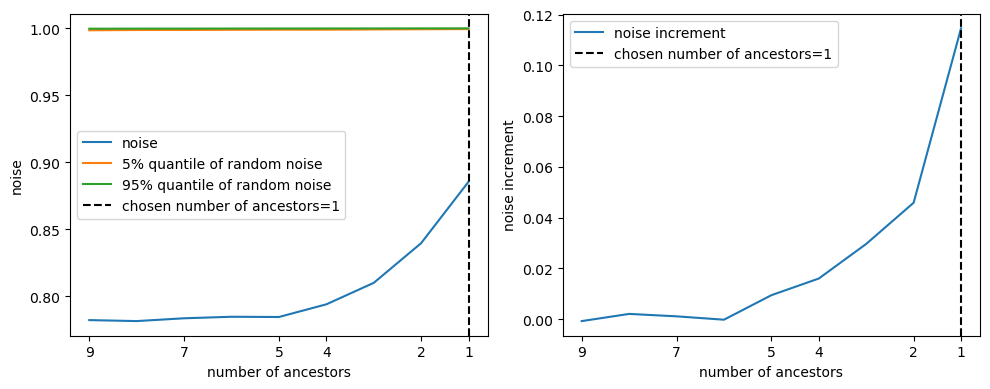

ancestors after pruning:  ['$PKC$'] 



inspecting $Jnk$
linear kernel (using gamma=8.64e+02)
 n/(n+s)=0.84, Z=1.00
quadratic kernel (using gamma=6.87e+02)
 n/(n+s)=0.85, Z=1.00
$Jnk$ has ancestors with linear kernel (n/(s+n)=0.84)
ancestors : ['$Mek$', '$Plcg$', '$PIP2$', '$PIP3$', '$Erk$', '$Akt$', '$PKA$', '$PKC$', '$P38$']
 n/(n+s)=0.84, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PIP3$', '$Erk$', '$Akt$', '$PKA$', '$PKC$', '$P38$']
 n/(n+s)=0.84, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Erk$', '$Akt$', '$PKA$', '$PKC$', '$P38$']
 n/(n+s)=0.84, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Akt$', '$PKA$', '$PKC$', '$P38$']
 n/(n+s)=0.84, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$Akt$', '$PKC$', '$P38$']
 n/(n+s)=0.85, Z=1.00
ancestors : ['$Mek$', '$Plcg$', '$PKC$', '$P38$']
 n/(n+s)=0.86, Z=1.00
ancestors : ['$Mek$', '$PKC$', '$P38$']
 n/(n+s)=0.87, Z=1.00
ancestors : ['$PKC$', '$P38$']
 n/(n+s)=0.89, Z=1.00
ancestors : ['$P38$']
 n/(n+s)=0.93, Z=1.00


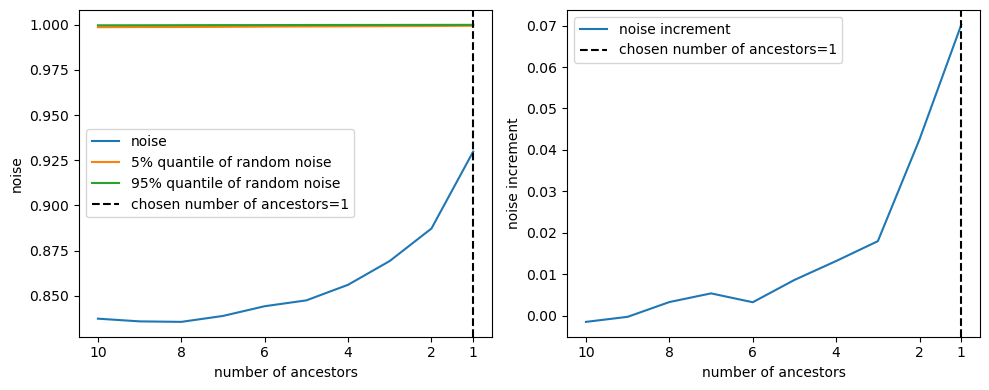

ancestors after pruning:  ['$P38$'] 





In [70]:
graph_discovery = GraphDiscoveryNew(X.T,onp.array(node_names),modes, possible_edges=possible_edges)

for node in graph_discovery.names:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(node,gamma='auto')
    print('\n')

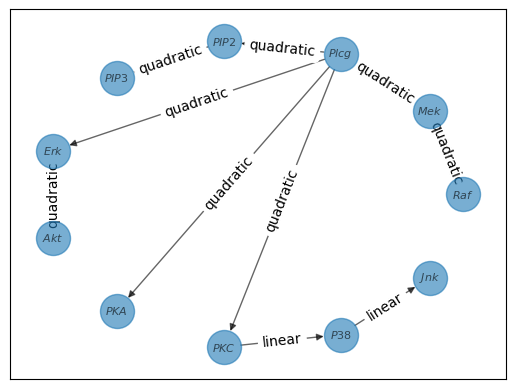

In [71]:
graph_discovery.plot_graph()